Works great but very slow !

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Making fake data set

<IPython.core.display.Javascript object>


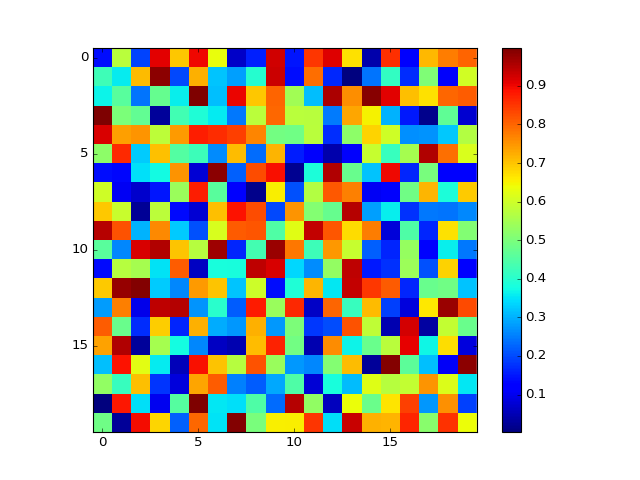

In [110]:
dirty_array = np.random.rand(20,20)
before_adding_gamma = np.array(dirty_array)
plt.figure(1)
plt.imshow(dirty_array, interpolation='none')
plt.colorbar()

Adding some gamma points

<IPython.core.display.Javascript object>


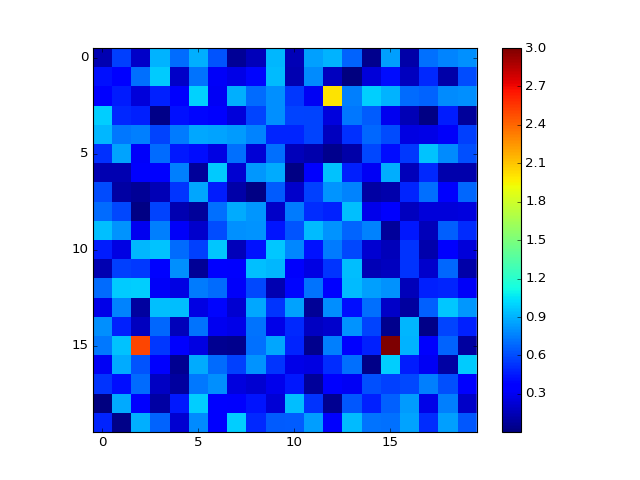

In [111]:
dirty_array[15,15] = 3
dirty_array[2,12] = 2
dirty_array[15,2] = 2.5
plt.figure(2)
plt.imshow(dirty_array, interpolation='none')
plt.colorbar()

In [112]:
grid_size = [5,5]

In [113]:
def gamma_filtering(coeff=0.5, grid_size=3, image=[]):
    '''
    if 0.5 * count of pixel is > mean of grid size 
    
    grid_size must be odd number
    '''
    if grid_size % 2 == 0:
        raise ValueError("Grid size must be an odd nmber")
    
    [image_height, image_width] = np.shape(image)    
    
    offset = np.int(grid_size/2)
    
    clean_image = np.array(image, dtype=float)
    for _h in np.arange(offset, image_height-1-offset):
        for _w in np.arange(offset, image_width-1-offset):
            _grid_array = np.array(image[_h-offset:_h+offset+1, _w-offset:_w+offset+1], dtype=float)
            _grid_array[offset, offset] = np.NaN
            _mean_value = np.nanmean(_grid_array)
            
            pixel_value = image[_h, _w]
            
            if coeff * pixel_value > _mean_value: #gamma
                clean_image[_h, _w] = _mean_value
            else:
                clean_image[_h, _w] = pixel_value
                
    return clean_image  

In [114]:
cleaned_image = gamma_filtering(coeff=0.3, grid_size=3, image=dirty_array)

1


<IPython.core.display.Javascript object>


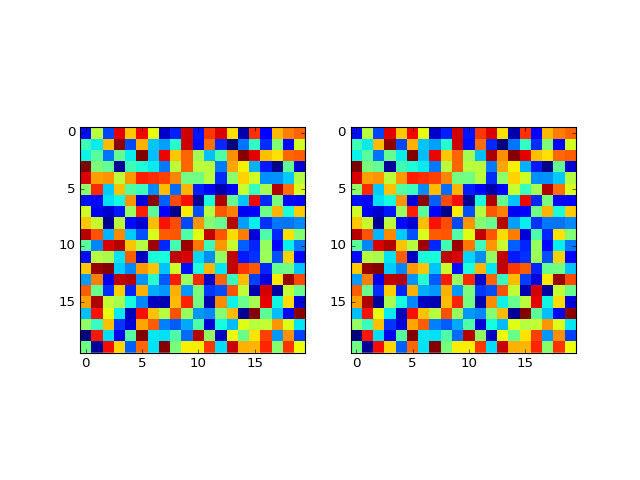

In [115]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(cleaned_image, interpolation='none')
ax[1].imshow(before_adding_gamma, interpolation='none')